In [19]:
import pandas as pd
import numpy as np

In [20]:
train = pd.read_csv("../Datasets/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
test = pd.read_csv("../Datasets/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
Main = train[["Survived", "Pclass", "Name", "Sex", "Age"]]
Main

,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,1,1,"Behr, Mr. Karl Howell",male,26.0


In [23]:
Men = Main.loc[Main.Sex=="male"]["Survived"]
Men

0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64

In [24]:
Men.value_counts()

Survived
0    468
1    109
Name: count, dtype: int64

In [25]:
Rate_Men = sum(Men) / len(Men)
Rate_Men

0.18890814558058924

In [26]:
Women = Main.loc[Main.Sex=="female"]["Survived"]
Women

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

In [27]:
Women.value_counts()

Survived
1    233
0     81
Name: count, dtype: int64

In [28]:
Rate_Women = sum(Women) / len(Women)
Rate_Women

0.7420382165605095

Survival Rate by Pclass and Sex

In [29]:
Rate_Pclass = Main.groupby(["Pclass", "Sex"])["Survived"].mean().reset_index()
Rate_Pclass

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

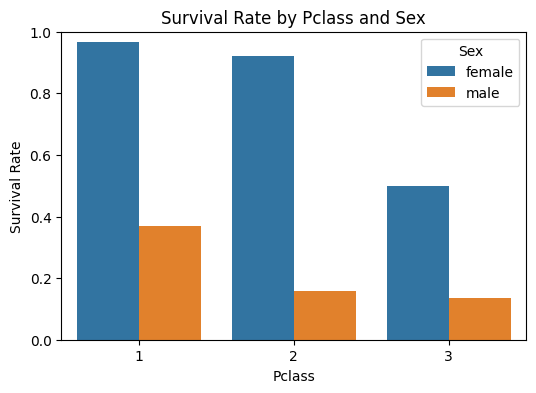

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(data=Rate_Pclass, x="Pclass", y="Survived", hue="Sex")

plt.title("Survival Rate by Pclass and Sex")
plt.ylabel("Survival Rate")
plt.xlabel("Pclass")
plt.ylim(0,1)
plt.legend(title="Sex")
plt.show()

Machine Learning

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
df = train[["Survived", "Pclass", "Sex", "Age", "Fare"]].dropna()

In [34]:
df = pd.get_dummies(df, columns=["Sex"], drop_first=True)

In [35]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

Accuracy: 0.7622377622377622
Confusion Matrix:
: [[70 17]
 [17 39]]
Classfication Report:
:               precision    recall  f1-score   support

           0       0.80      0.80      0.80        87
           1       0.70      0.70      0.70        56

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



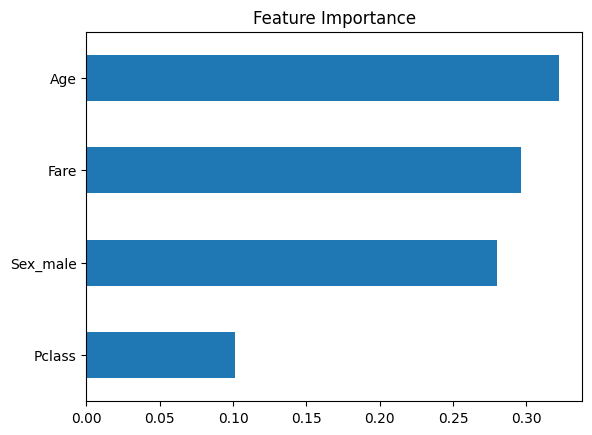

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n:", confusion_matrix(y_test, y_pred))
print("Classfication Report:\n:", classification_report(y_test, y_pred))

importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind="barh")
plt.title("Feature Importance")
plt.show()